# Teste t Pareado:

[aula](https://github.com/ufrpe-ensino/ia-aulas/blob/master/00-intro/05_TestesEstatisticos.ipynb)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# Carregar os dados de pressão arterial
df = pd.read_csv("blood_pressure.csv")

# Visualizar as primeiras linhas do DataFrame
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [6]:
# Estatísticas descritivas para as colunas de interesse
df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


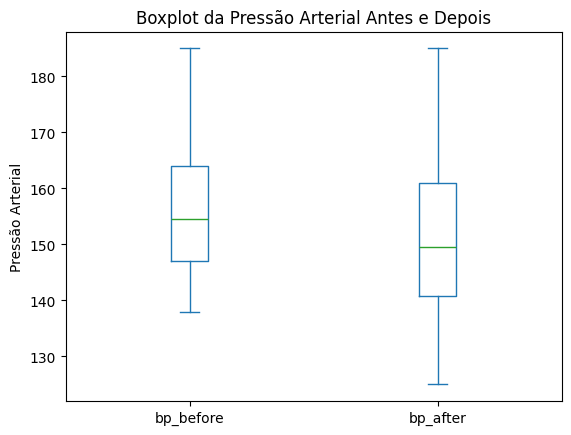

In [7]:
# Boxplot para identificar outliers
df[['bp_before', 'bp_after']].plot(kind='box', title='Boxplot da Pressão Arterial Antes e Depois')
plt.ylabel('Pressão Arterial')
plt.show()

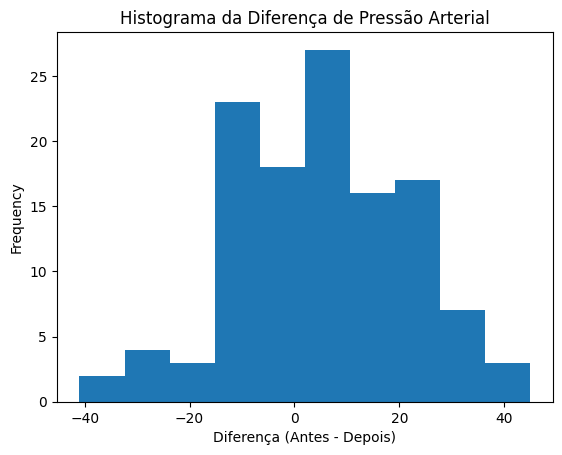

In [8]:
# Calcular a diferença entre as pressões antes e depois
df['bp_difference'] = df['bp_before'] - df['bp_after']

# Visualizar a distribuição da diferença
df['bp_difference'].plot(kind='hist', bins=10, title='Histograma da Diferença de Pressão Arterial')
plt.xlabel('Diferença (Antes - Depois)')
plt.show()

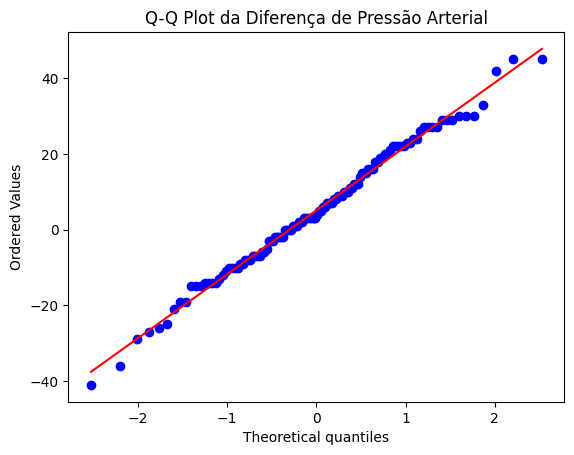

In [9]:
# Gráfico Q-Q para avaliar a normalidade
stats.probplot(df['bp_difference'], plot=plt)
plt.title('Q-Q Plot da Diferença de Pressão Arterial')
plt.show()

In [10]:
# Teste de Shapiro-Wilk para normalidade
stats.shapiro(df['bp_difference'])

ShapiroResult(statistic=np.float64(0.9926847193605787), pvalue=np.float64(0.7842279908227653))

In [11]:
# Teste t pareado
stats.ttest_rel(df['bp_before'], df['bp_after'])

TtestResult(statistic=np.float64(3.3371870510833657), pvalue=np.float64(0.0011297914644840823), df=np.int64(119))